In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True

In [9]:
## Merging 12 months of data into a single file 
allm = [] 
for filename in os.listdir('./Sales_Data'):
    table = pd.read_csv('./Sales_Data/'+filename)
    allm.append(table)

data = pd.concat(allm)
clean_data = data.dropna()


In [10]:
# Cleaning data efficiently

clean_data.loc[:, 'Quantity Ordered'] = clean_data['Quantity Ordered'].replace(['Quantity Ordered'], False)
clean_data.loc[:, 'Price Each'] = clean_data['Price Each'].replace(['Price Each'], False)
clean_data.loc[:, 'Order Date'] = clean_data['Order Date'].replace(['Order Date'], False)

# Create Profits = Quantity * Price Column
clean_data['Profits'] = clean_data['Quantity Ordered'].astype(float) * clean_data['Price Each'].astype(float)

# Create month column
month = []
for timeframe in clean_data['Order Date']:
    if timeframe == False:
        month.append(False)
    else:
        month.append(dt.strptime(timeframe, '%m/%d/%y %H:%M').strftime('%m'))    
clean_data['Month'] = month

# Create city column
clean_data['City'] = clean_data['Purchase Address'].str.split(',').str[1] + ' ' + clean_data['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]

# Create Hour In Day column
clean_data['HourInDay'] = clean_data['Order Date'].str.split().str[1].str.split(':').str[0]

# Create Time Of Day column
clean_data['TimeOfDay'] = clean_data['Order Date'].str.split().str[1]

# How many rows are considered invalid
print(clean_data['Quantity Ordered'].value_counts())
print('Number of null values:', clean_data['Quantity Ordered'].isna().sum())

clean_data = clean_data.dropna()
clean_data

Quantity Ordered
1        168552
2         13324
3          2920
4           806
False       355
5           236
6            80
7            24
8             5
9             3
Name: count, dtype: int64
Number of null values: 0


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Profits,Month,City,HourInDay,TimeOfDay
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,Dallas TX,08,08:46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston MA,22,22:30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles CA,14,14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles CA,14,14:38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles CA,09,09:27
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,09,Los Angeles CA,20,20:56
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,09,San Francisco CA,16,16:00
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,09,San Francisco CA,07,07:39
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,09,San Francisco CA,17,17:30


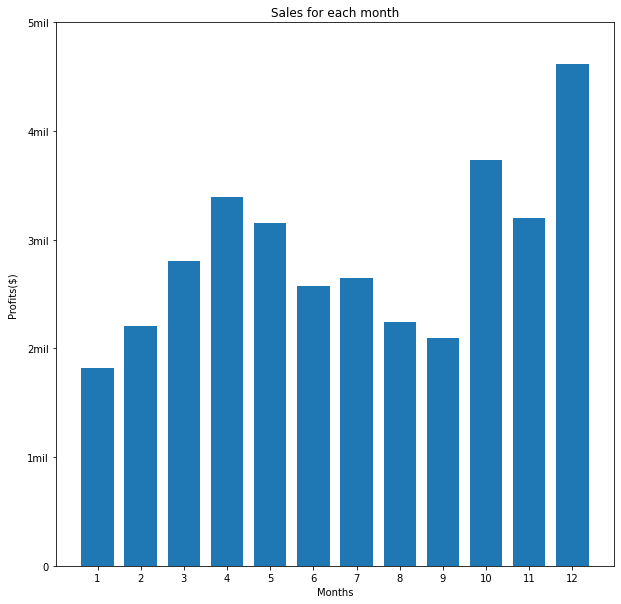

Profits for the month: $4613443.34
Month: December


In [6]:
#### Q1. What is the best month for sales? How much was earned that month?
mostprofits = clean_data.loc[:, ['Month', 'Profits']]
mostprofits = mostprofits[mostprofits != False].groupby('Month').sum() 

plt.figure(1, figsize=(10,10))
plt.bar(range(1,13), mostprofits['Profits'], width=0.75)
plt.title('Sales for each month')
plt.ylabel('Profits($)', labelpad=10.0)
plt.yticks(np.arange(0, 6000000, 1000000), labels=['0', '1mil', '2mil', '3mil', '4mil', '5mil'])
plt.xlabel('Months')
plt.xticks(range(1,13))
plt.show()  

print("Profits for the month: ${}".format(mostprofits['Profits'].max()))
print("Month: December") 

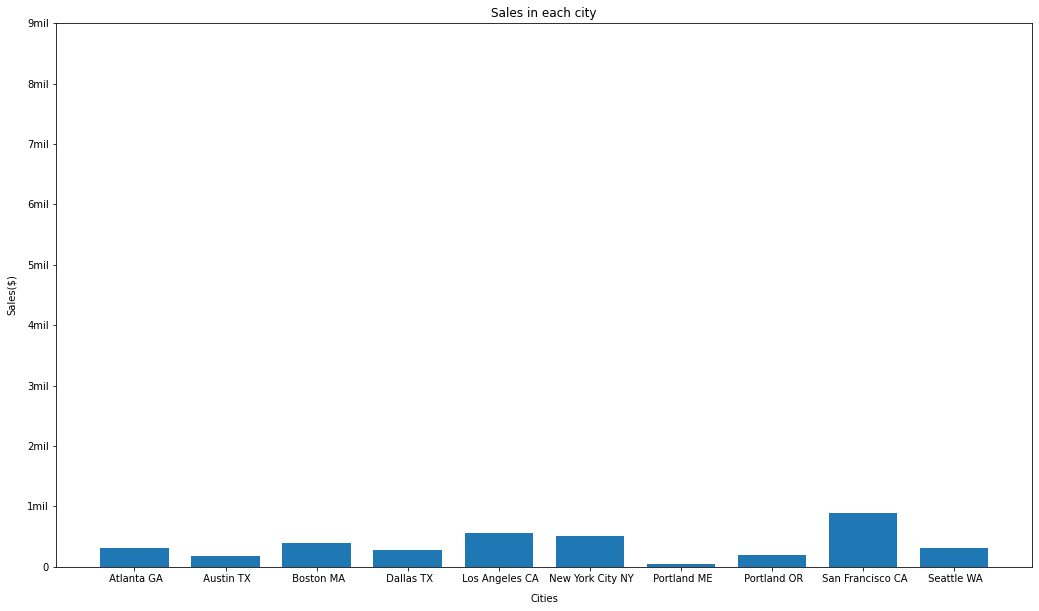

City with the highest sales: San Francisco CA


In [17]:
#### Q2. Which city has the highest number of sales
salesincity = clean_data[['City', 'Profits']].groupby('City').sum()
salesincity = salesincity[salesincity.index != False]

cities = ['Atlanta GA', 'Austin TX', 'Boston MA', 'Dallas TX', 'Los Angelas CA', 'New York City NY', 'Portland ME', 'Portland OR', 'San Francisco CA', 'Seattle WA']
cities = [city for city, df in salesincity.groupby('City')]
plt.figure(2, figsize=(17.5,10))
plt.bar(np.arange(0, len(salesincity.index)), salesincity['Profits'], width=0.75)
plt.title('Sales in each city')
plt.xlabel('Cities', labelpad=10.0)
plt.xticks(np.arange(0, len(salesincity.index)), labels=cities)
plt.ylabel('Sales($)', labelpad=10.0)
plt.yticks(np.arange(0, 10000000, 1000000), labels=['0', '1mil', '2mil', '3mil', '4mil', '5mil', '6mil', '7mil', '8mil', '9mil'])
plt.show()

print("City with the highest sales: San Francisco CA")

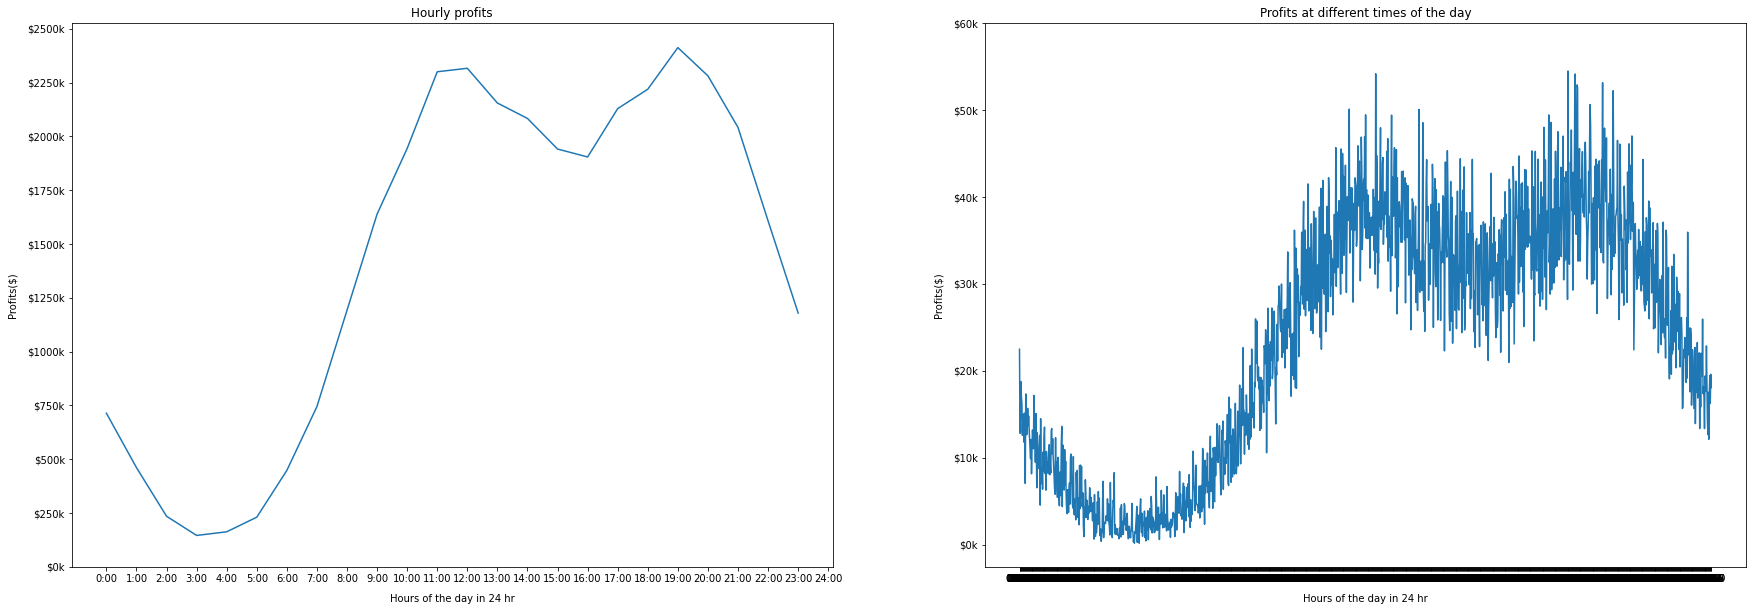

1000 to 1900HRS would be best


In [4]:
#### Q3. What time should we display advertisements to maximize the likelihood of customer’s buying product?

hourlyprofits = clean_data[['Profits', 'HourInDay']].groupby('HourInDay').sum()
profitsattimings = clean_data[['Profits', 'TimeOfDay']].groupby('TimeOfDay').sum()
hours = ['{}:00'.format(x) for x in np.arange(0, 25, 1)]
figs, axs = plt.subplots(1,2, figsize=(30,10))

axs[0].plot(hourlyprofits.index, hourlyprofits['Profits'])
axs[0].set_title('Hourly profits')
axs[0].set_yticks(np.arange(0,2750000,250000), labels=['${}k'.format(x) for x in np.arange(0,2750,250)])
axs[0].set_ylabel('Profits($)', labelpad=10.0)
axs[0].set_xticks(np.arange(0,25,1), labels=hours)
axs[0].set_xlabel('Hours of the day in 24 hr', labelpad=10.0)

axs[1].plot(profitsattimings.index, profitsattimings['Profits'])
axs[1].set_title('Profits at different times of the day')
axs[1].set_yticks(np.arange(0,70000, 10000), labels=['${}k'.format(x) for x in np.arange(0,70,10)])
axs[1].set_ylabel('Profits($)', labelpad=10.0)
axs[1].set_xlabel('Hours of the day in 24 hr', labelpad=10.0)

plt.show()

print('1000 to 1900HRS would be best')

# INCOMPLETE

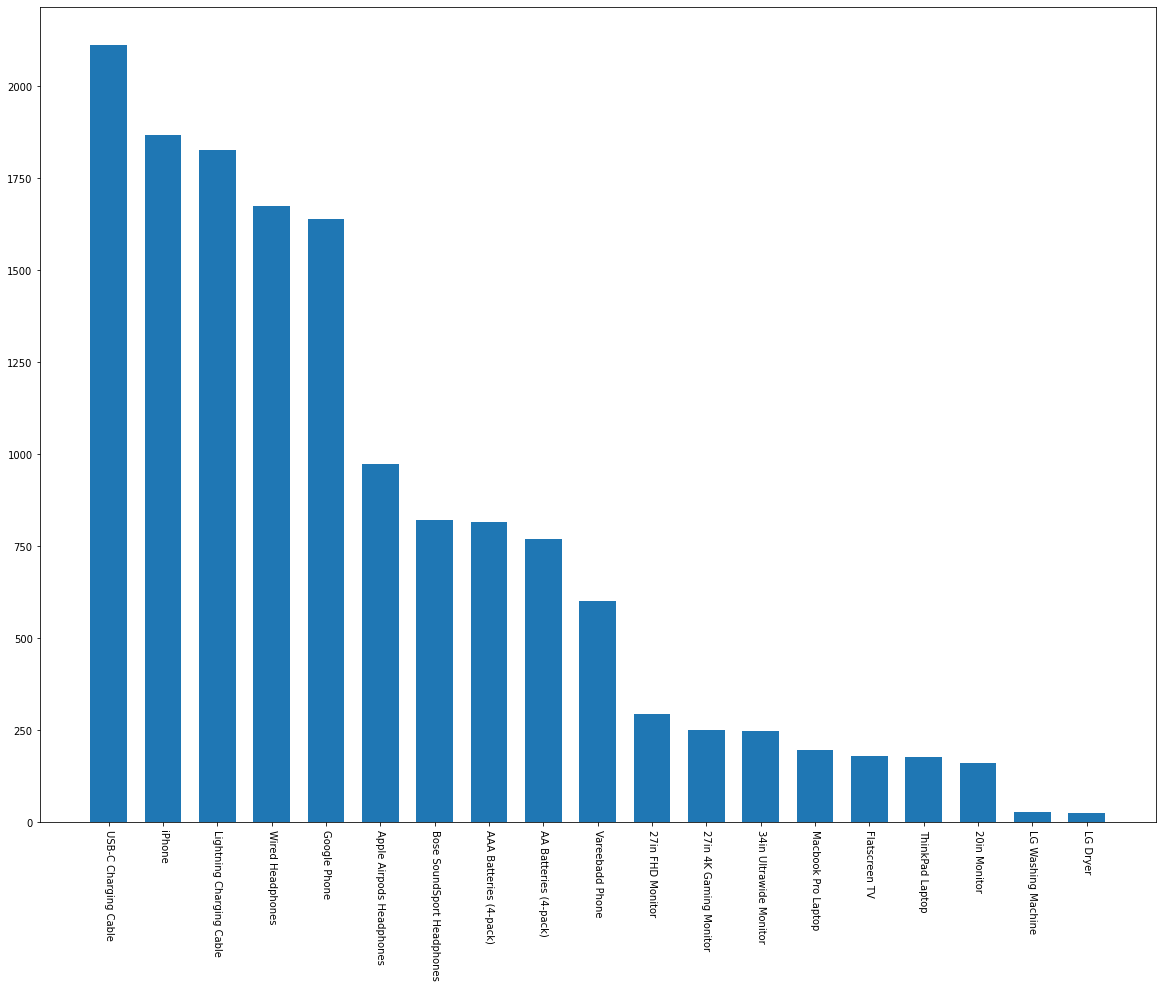

iPhone and lightning charging cable


In [12]:
#### Q4.(WRONG SOLUTION) What products are most often sold together?

boughtmorethan2products = clean_data['Order ID'].value_counts()
boughtmorethan2products = boughtmorethan2products[boughtmorethan2products >= 2]
ids = boughtmorethan2products.index.tolist()

clean_data['2ormorebought'] = clean_data['Order ID'].isin(ids)
dataneeded = clean_data[['Order ID', 'Product', 'Quantity Ordered', '2ormorebought']]

dataneeded = dataneeded[dataneeded['2ormorebought'] == True]

psold = dataneeded.groupby('Product').count().sort_values('Quantity Ordered', ascending=False)

plt.figure(figsize=(20,15))
plt.bar(psold.index, psold['Quantity Ordered'], width=0.675)
plt.xticks(psold.index, rotation=-90)
plt.show()

print('iPhone and lightning charging cable')

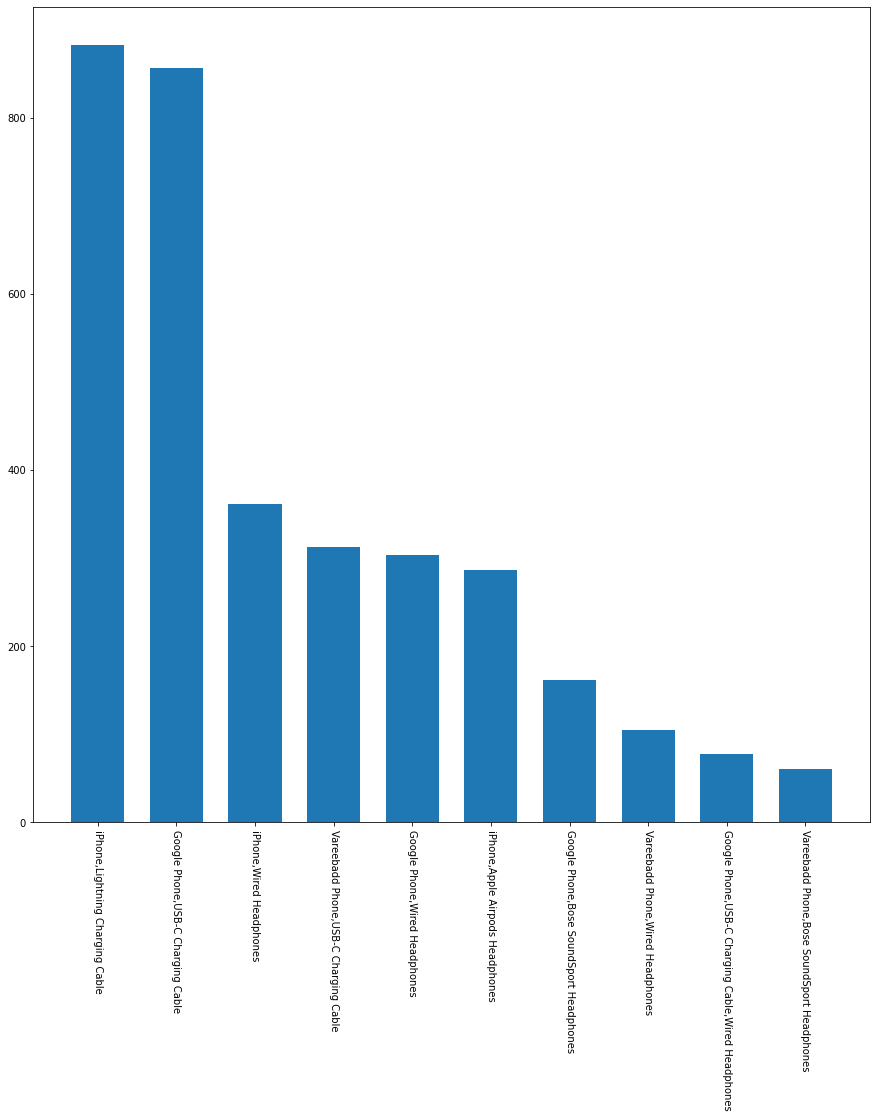

Grouped
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: count, dtype: int64


In [41]:
#### Q4. What products are most often sold together?

q4data = clean_data[clean_data['Order ID'].duplicated(keep=False)]
q4data['Grouped'] = q4data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
q4data = q4data[['Order ID', 'Grouped']].drop_duplicates()
top10 = q4data['Grouped'].value_counts().head(10)

plt.figure(figsize=(15,15))
plt.bar(top10.index, top10, width=0.675)
plt.xticks(top10.index, rotation=-90)
plt.show()

print(top10)


C:\Users\Ng Zheng Chong\AppData\Local\Temp\ipykernel_10916\587681868.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(numproductssold['Product'], rotation=-90)


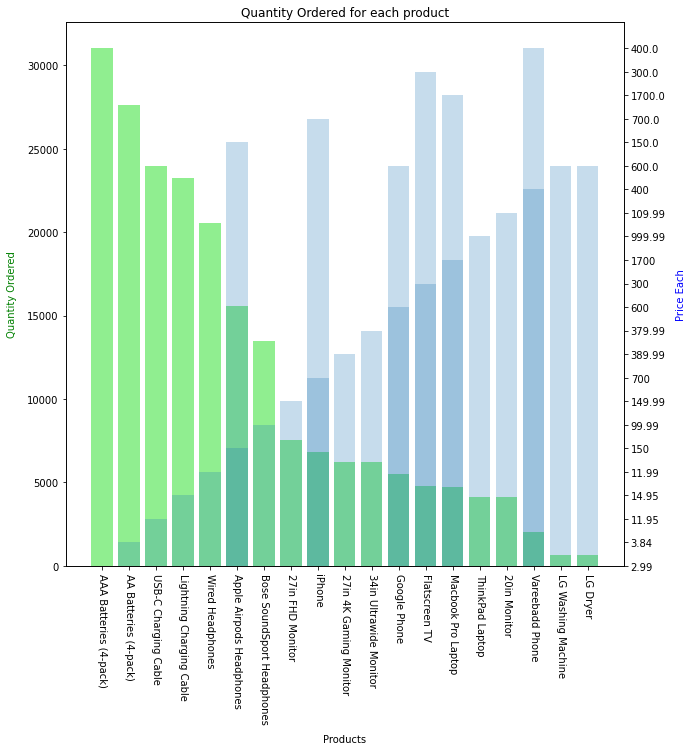

In [97]:
# Q5. What product sold the most? Why do you think it sold the most?
q5data = clean_data
q5data['Quantity Ordered'] = q5data['Quantity Ordered'].astype(int)
numproductssold = q5data[['Product', 'Quantity Ordered', 'Price Each']].groupby(['Product', 'Price Each']).sum().sort_values('Quantity Ordered', ascending=False).reset_index()
numproductssold = numproductssold.loc[numproductssold['Quantity Ordered'] != 0]

fig, ax = plt.subplots(figsize=(10,10))
ax2 = ax.twinx()
ax.bar(numproductssold['Product'], numproductssold['Quantity Ordered'], color='lightgreen')
ax2.bar(numproductssold['Product'], numproductssold['Price Each'], alpha=0.25)
ax.set_title('Quantity Ordered for each product')
ax.set_ylabel('Quantity Ordered', labelpad=10.0, color='g')
ax2.set_ylabel('Price Each', labelpad=10.0, color='b')
ax.set_xlabel('Products', labelpad=10.0)
ax.set_xticklabels(numproductssold['Product'], rotation=-90)
plt.show()
